# Web APIs Assignment

This program uses the New York Times Books API to fetch book data and display it in pandas DataFrame.

In [1]:
# import libraries
import pandas as pd
import numpy as np
import requests as rq

The New York Times Books API requires a key to access and make requests.

In [2]:
#API key
API_KEY = 'MEhY8SJPO0J0czqrDSvuvrgmoYGM6d1J'

Define a function that GET the json data from New York Times using API.

In [3]:
# function to get data from New York Times
def get_NYT_data(url, key):
    requestUrl = url + 'api-key=' + key
    requestHeaders = {
        "Accept": "application/json"
    }
    response = rq.get(requestUrl, headers=requestHeaders)
    data = response.json()
    
    return data

### Get Book Lists

Get lists of all New York Times bestsellers book rankings by the New York Times.

In [4]:
# book lists url
BOOK_LISTS_URL = 'https://api.nytimes.com/svc/books/v3/lists/names.json?'

<b>The returned list of json file is very long!!!</b>

In [5]:
# get book lists json
book_lists_json = get_NYT_data(BOOK_LISTS_URL, API_KEY)

# Output of book_lists_json

The following is a sample of the output of the book lists json

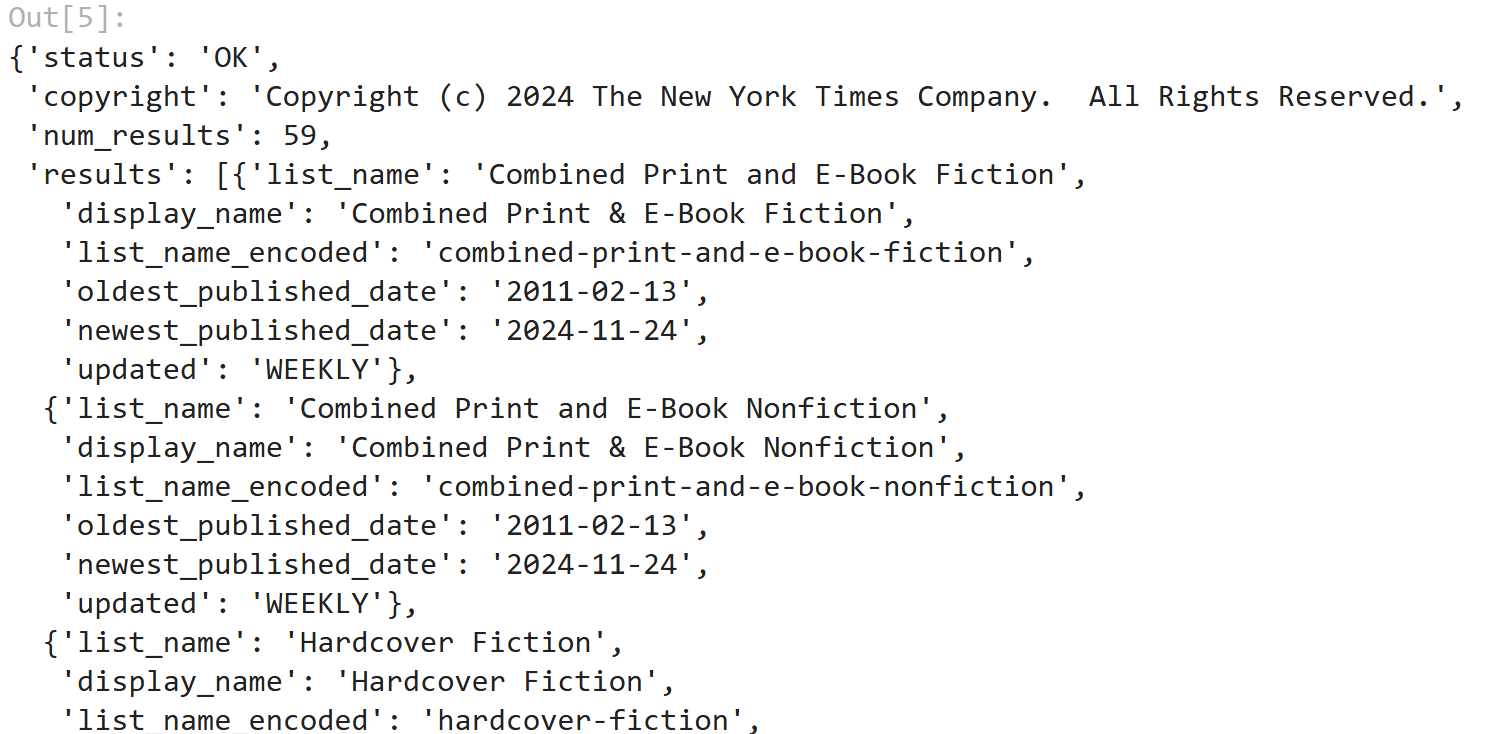

From the returned json data, the 'results' key will return the value that contains a list of booklists data. We will extract that information and transform it into a pandas DataFrame.

In [6]:
book_lists_data = book_lists_json['results']
book_lists_df = pd.DataFrame(book_lists_data)
book_lists_df.head()

,list_name,display_name,list_name_encoded,oldest_published_date,newest_published_date,updated
0,Combined Print and E-Book Fiction,Combined Print & E-Book Fiction,combined-print-and-e-book-fiction,2011-02-13,2024-11-24,WEEKLY
1,Combined Print and E-Book Nonfiction,Combined Print & E-Book Nonfiction,combined-print-and-e-book-nonfiction,2011-02-13,2024-11-24,WEEKLY
2,Hardcover Fiction,Hardcover Fiction,hardcover-fiction,2008-06-08,2024-11-24,WEEKLY
3,Hardcover Nonfiction,Hardcover Nonfiction,hardcover-nonfiction,2008-06-08,2024-11-24,WEEKLY
4,Trade Fiction Paperback,Paperback Trade Fiction,trade-fiction-paperback,2008-06-08,2024-11-24,WEEKLY


### Hardcover Fiction Best-sellers in 2018-01-01

I am interested in getting a list of best-sellers for the hardcover fiction in January 1st, 2018.

In [7]:
# URl for current best-sellers for hardcover fiction.
HARDCOVER_FICS_URL ='https://api.nytimes.com/svc/books/v3/lists/2018-01-01/hardcover-fiction.json?'

In [8]:
# get hardcover fiction bestsellers list using API
hardcover_fics_json = get_NYT_data(HARDCOVER_FICS_URL, API_KEY)

# hardcover_fics_json

The following is a sample of the hardcover_fics_json

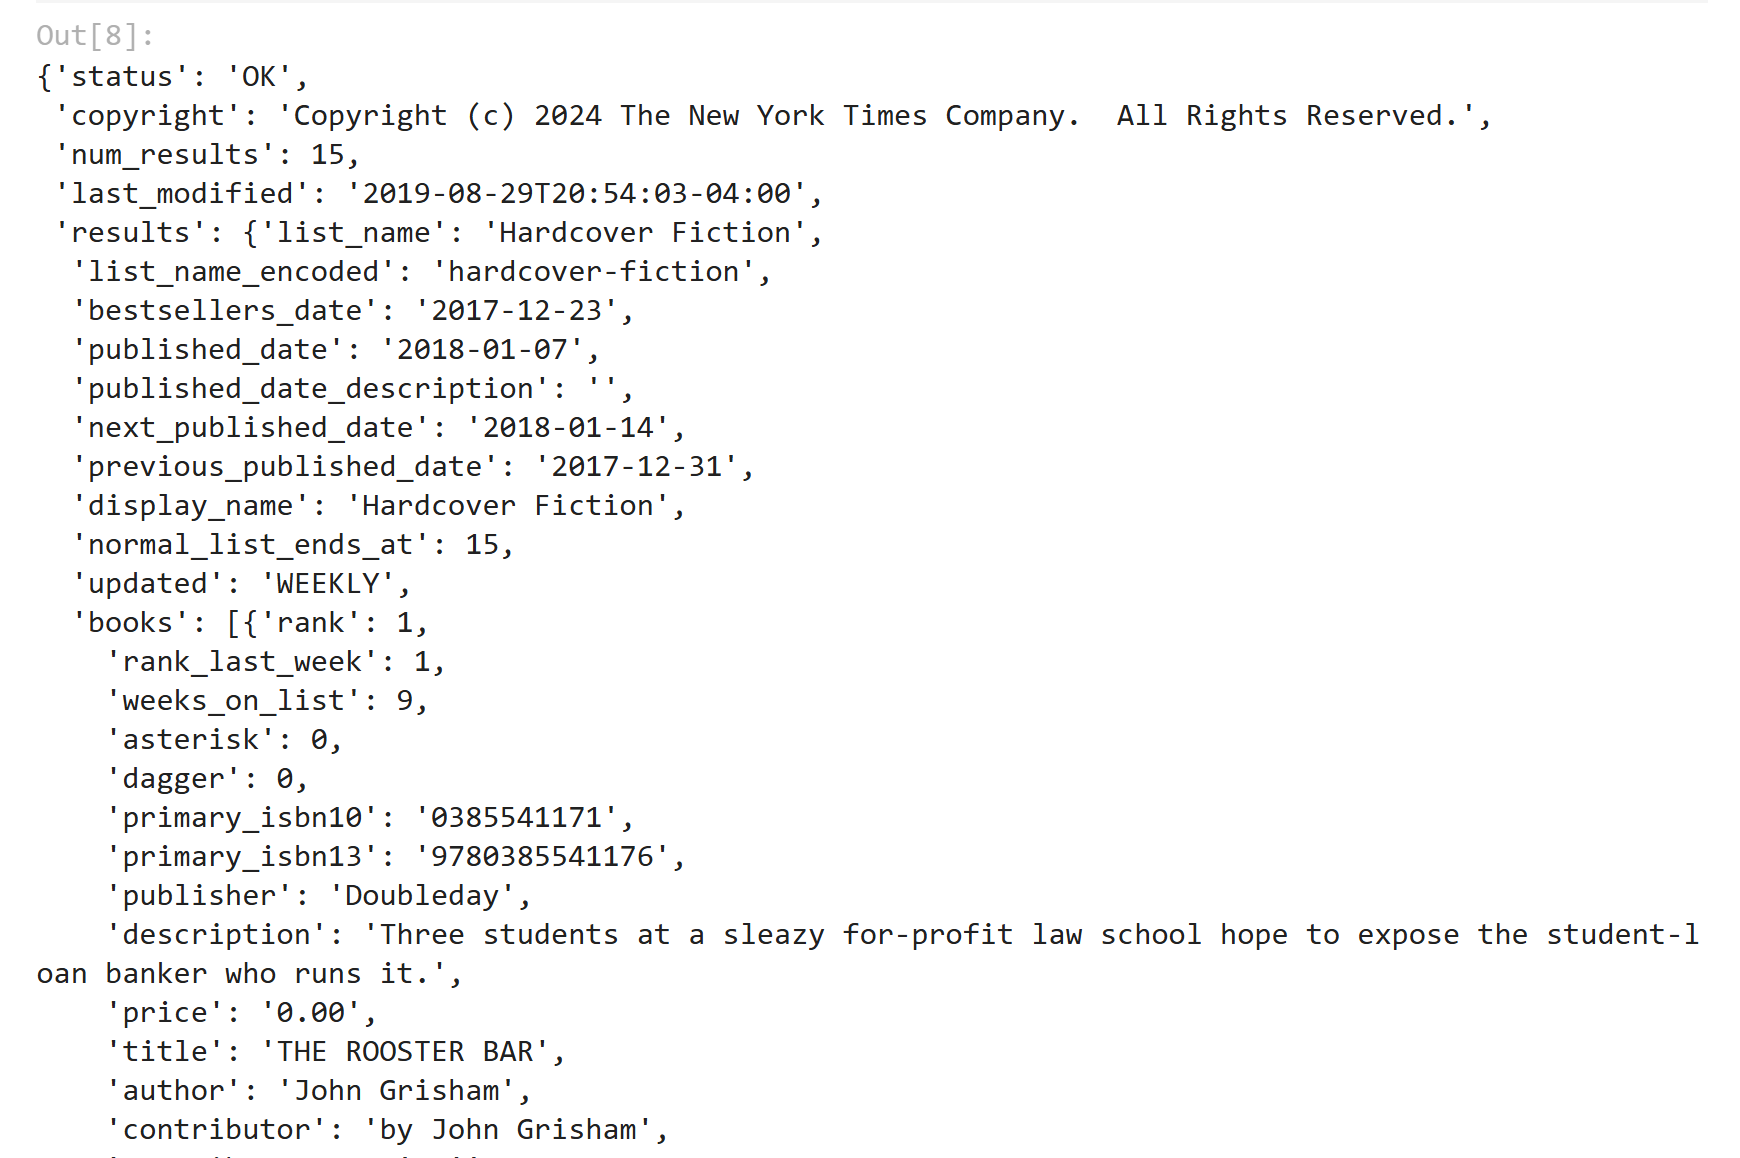

From the returned nested json data, the 'results' dictionary from the json contains <b>information about the list</b> of hardcover fiction bestsellers in January 1st, 2018. However, we are interested in the actual <b>list of books</b> instead of information about the list, We will extract the 'books' information from the 'results' dictionary and transform it into a pandas DataFrame.

In [9]:
hardcover_fics_books = hardcover_fics_json['results']['books']
hardcover_fics_books_df = pd.DataFrame(hardcover_fics_books)
hardcover_fics_books_df.head()

,rank,rank_last_week,weeks_on_list,asterisk,dagger,primary_isbn10,primary_isbn13,publisher,description,price,...,book_image_height,amazon_product_url,age_group,book_review_link,first_chapter_link,sunday_review_link,article_chapter_link,isbns,buy_links,book_uri
0,1,1,9,0,0,0385541171,9780385541176,Doubleday,Three students at a sleazy for-profit law scho...,0.00,...,495,https://www.amazon.com/Rooster-Bar-John-Grisha...,,,,,,"[{'isbn10': '0385541171', 'isbn13': '978038554...","[{'name': 'Amazon', 'url': 'https://www.amazon...",nyt://book/deda489f-c638-5df0-89d4-2ef7a62474fa
1,2,2,12,0,0,0385514239,9780385514231,Doubleday,A symbology professor goes on a perilous quest...,0.00,...,495,https://www.amazon.com/Origin-Novel-Dan-Brown-...,,,,,,"[{'isbn10': '0385514239', 'isbn13': '978038551...","[{'name': 'Amazon', 'url': 'https://www.amazon...",nyt://book/c13db3b1-8c76-5cd4-8b97-32f2dca7b183
2,3,3,5,0,0,0316273902,9780316273909,"Little, Brown",Detective Cross takes on a case even though he...,0.00,...,495,https://www.amazon.com/People-vs-Alex-Cross/dp...,,,,,,"[{'isbn10': '0316273902', 'isbn13': '978031627...","[{'name': 'Amazon', 'url': 'https://www.amazon...",nyt://book/c086e446-d648-5374-b6b0-43985d04aa5e
3,4,5,6,0,0,0553448129,9780553448122,Crown,A small-time smuggler living in a lunar colony...,0.00,...,495,https://www.amazon.com/Artemis-Novel-Andy-Weir...,,,,,,"[{'isbn10': '0553448129', 'isbn13': '978055344...","[{'name': 'Amazon', 'url': 'https://www.amazon...",nyt://book/d3ab6698-2e61-5181-ad30-bd1ccd41180d
4,5,4,7,0,0,0399593489,9780399593482,Delacorte,Jack Reacher tracks down the owner of a pawned...,0.00,...,495,https://www.amazon.com/Midnight-Line-Jack-Reac...,,https://www.nytimes.com/2017/11/08/books/revie...,,,,"[{'isbn10': '0399593489', 'isbn13': '978039959...","[{'name': 'Amazon', 'url': 'https://www.amazon...",nyt://book/9c761887-b69e-54c9-a82d-a8eeeac8c9c5


There is a lot of information about books and it is all crammed together. However, I am mainly interested in the ranking of the books, title, author, isbn13, last week ranking and how many weeks the books stayed on the bestseller list.

In [10]:
hardcover_fics_books_df[['rank','title', 'author', 'primary_isbn13', 'rank_last_week','weeks_on_list']]

,rank,title,author,primary_isbn13,rank_last_week,weeks_on_list
0,1,THE ROOSTER BAR,John Grisham,9780385541176,1,9
1,2,ORIGIN,Dan Brown,9780385514231,2,12
2,3,THE PEOPLE VS. ALEX CROSS,James Patterson,9780316273909,3,5
3,4,ARTEMIS,Andy Weir,9780553448122,5,6
4,5,THE MIDNIGHT LINE,Lee Child,9780399593482,4,7
5,6,YEAR ONE,Nora Roberts,9781250122957,6,3
6,7,TOM CLANCY POWER AND EMPIRE,Marc Cameron,9780735215894,9,4
7,8,END GAME,David Baldacci,9781455586608,7,6
8,9,SLEEPING BEAUTIES,Stephen King and Owen King,9781501163401,10,13
9,10,LITTLE FIRES EVERYWHERE,Celeste Ng,9780735224292,8,14
